# Simulation

In this lesson, we will work through several examples of using random numbers to simulate real-world scenarios.

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualizations

np.random.seed(1349)

### How will we utilize Python to obtain probabilities?

We will utilize Monte Carlo simulations.

A Monte Carlo simulation is a means to recreate potential events and empirically take the results of simiulated trials to obtain a reasonably precise estimate of a desired probability.

What does this mean for us here?

In [ ]:
# Let's take a hypothetical base probability. 
# What is the probability of rolling a one (1) on a single, standard, fair six-sided die?


In [18]:
# Potential outcomes of a die roll:
possible_outcomes= [1,2,3,4,5,6]

In [17]:
# options that equal 1: just 1, literally one

ideal_roll= 1

In [ ]:
# theoretical probability: 1/6

In [16]:
1/6

0.16666666666666666

In [ ]:
# Now how would we do this with a simulation?


In [ ]:
# We will do it utilizing a large number of trials, that we calculate.

In [ ]:
# Allow us to examine the same problem: Probability of rolling a 1 on a fair six-sided die.

In [20]:
# First, we will set a value for the number of trials that we want to conduct.
# We have the power of computation at our finger tips, so let's shoot for something like one million.
num_trials = 10 ** 5




In [21]:
# We have one die roll for each trial, which is our event, that we call a single simulation
n_dice = 1

In [ ]:
# We will do a single simulation one million times, with each simulation being a die roll.

In [22]:
rolls = np.random.choice(possible_outcomes, num_trials*n_dice).reshape(num_trials, n_dice)

In [23]:
type(rolls)

numpy.ndarray

In [24]:
rolls

array([[2],
       [3],
       [2],
       ...,
       [4],
       [1],
       [1]])

In [25]:
rolls.shape

(100000, 1)

In [26]:
(rolls== 1).mean()

0.16699

## Generating Random Numbers with Numpy

The `numpy.random` module provides a number of functions for generating random numbers.

- `np.random.choice`: selects random options from a list
- `np.random.uniform`: generates numbers between a given lower and upper bound
- `np.random.random`: generates numbers between 0 and 1
- `np.random.randn`: generates numbers from the standard normal distribution
- `np.random.normal`: generates numbers from a normal distribution with a specified mean and standard deviation

## Example Problems

### Carnival Dice Rolls

> You are at a carnival and come across a person in a booth offering you a game
> of "chance" (as people in booths at carnivals tend to do).

> You pay 5 dollars and roll 3 dice. If the sum of the dice rolls is greater
> than 12, you get 15 dollars. If it's less than or equal to 12, you get
> nothing.

> Assuming the dice are fair, should you play this game? How would this change
> if the winning condition was a sum greater than *or equal to* 12?

To simulate this problem, we'll write the python code to simulate the scenario described above, then repeat it a large amount of times.

One way we can keep track of all the simulations is to use a 2-dimensional matrix. We can create a matrix where each row represents one "trial". Each row will have 3 columns, representing the 3 dice rolls.

In [80]:
n_trials = nrows= 10_000
n_dice = ncols= 3

rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice)

In [81]:
# add reshape to rolls variable to reshape column and rows
rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice).reshape(nrows, ncols)


rolls

array([[6, 6, 4],
       [2, 4, 4],
       [2, 2, 1],
       ...,
       [6, 6, 1],
       [3, 6, 2],
       [1, 1, 6]])

Here we used the `choice` function to randomly select an element out of the list of the number 1-6, effectively simulating a dice roll. The second argument supplied to `choice` is the total number of dice to roll. Once we have generated all the dice rolls, we use the `.reshape` method to create our matrix with 3 columns and 10,000 rows.

Now that we have all of the simulated dice rolls, we want to get the sum of the dice rolls for each trial. To do this, we can use the `.sum` function and specify that we want the sum of every row (as opposed to the sum of all the numbers, or the sum by column) with the `axis` key word argument.

In [52]:
sums_by_trial = rolls.sum(axis=1)
sums_by_trial

array([14, 10,  6, ..., 13,  8,  9])

Let's pause here for a minute and visualize the data we have:

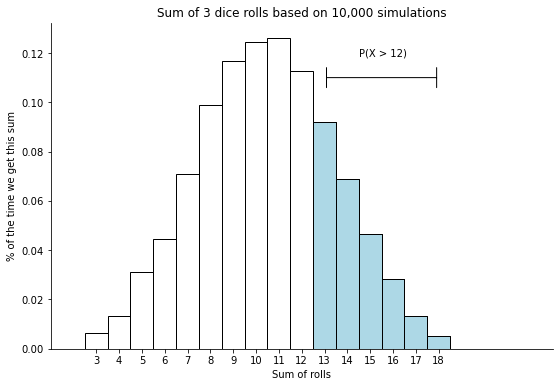

In [53]:
viz.simulation_example1(sums_by_trial)

The area shaded in lightblue represents our chance of winning, that is, the number of times that the sum of 3 dice rolls is greater than 12.

We can now convert each value in our array to a boolean value indicating whether or not we won:

In [54]:
wins= sums_by_trial > 12

To calculate an overall win rate, we can treat each win as a `1` and each loss as `0`, then take the average of the array:

In [63]:
win_rate = wins.mean()

In [55]:
#another way to do code above, commented out so code won't run

# win_rate = wins.astype('int').mean()

In [64]:
win_rate

0.2544

Now that we know our win rate, we can calculate the expected profit:

In [65]:
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

-1.1839999999999997

In [66]:
expected_winnings

3.8160000000000003

So we would expect, based on our simulations, on average, to lose a little over a dollar everytime we play this game.

To answer the last part of the question, we can recalculate our win rate based on the sums being greater than or equal to 12:

In [67]:
wins = sums_by_trial >= 12
win_rate = wins.mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost
expected_profit

0.5049999999999999

If our win condition changes to the sum being greater than or equal to 12, then, based on our simulations, on average, we expect to win about 58 cents.

## Mini Exercise:

What is the probability of rolling "snake eyes" on a roll of two (fair) dice?

In [103]:
(1/6) * (1/6)

0.027777777777777776

In [110]:
n_trials2 = nrows2= 10 ** 6
n_dice2 = ncols2= 2

rolls2 = np.random.choice([1,2,3,4,5,6], n_trials2 * n_dice2)

In [111]:
rolls2 = np.random.choice([1,2,3,4,5,6], n_trials2 * n_dice2).reshape(nrows2, ncols2)

rolls2

array([[5, 1],
       [3, 3],
       [4, 3],
       ...,
       [6, 4],
       [5, 4],
       [2, 5]])

In [112]:
#change into a boolean

(rolls2.sum(axis=1) == 2)

array([False, False, False, ..., False, False, False])

In [113]:
#mean of boolean values
(rolls2.sum(axis=1) == 2).mean()

0.027619

### No Rest or Relaxation

> There's a 30% chance my son takes a nap on any given weekend day. What is the chance that he takes a nap at least one day this weekend? What is the probability that he doesn't nap at all?

Let's first do a little bit of setup:

In [114]:
p_nap = 0.3
ndays = n_cols = 2
n_simulated_weekends = n_rows= 10 ** 6

To simulate the results from many weekends, we'll create a 2 x 10,000 matrix, with 2 being the number of days in a weekend and 10,000 being the number of simulations we want to run.

To determine whether or not a nap is taken on a given day, we'll generate a random number between 0 and 1, and say that it is a nap if it is less than our probability of taking a nap.

In [117]:
trials = np.random.random((nrows2, ncols2))

In [118]:
trials[:10]

array([[0.33535947, 0.69750378],
       [0.94430823, 0.54054585],
       [0.01996268, 0.91734504],
       [0.06592182, 0.15249129],
       [0.07436505, 0.4390064 ],
       [0.07895158, 0.90156788],
       [0.98298273, 0.01978592],
       [0.16336789, 0.06647719],
       [0.7540939 , 0.45021646],
       [0.18539777, 0.30903197]])

In [119]:
naps= trials < p_nap

In [120]:
naps

array([[False, False],
       [False, False],
       [ True, False],
       ...,
       [False, False],
       [ True,  True],
       [ True, False]])

Now that we have each day as either true or false, we can take the sum of each row to find the total number of naps for the weekend. When we sum an array of boolean values, numpy will treat `True` as 1 and `False` as 0.

In [121]:
naps.sum(axis=1)

array([0, 0, 1, ..., 0, 2, 1])

Now we have the results of our simulation, an array where each number in the array represents how many naps were taken in a two day weekend.

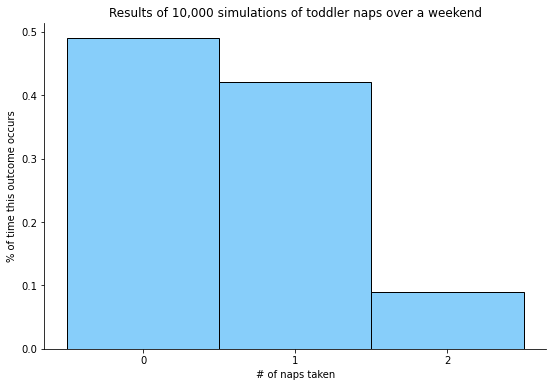

In [122]:
viz.simulation_example2(naps)

We can use this to answer our original questions, what is the probability that at least one nap is taken?

In [123]:
(naps.sum(axis=1) >=1).mean()

0.510173

What is the probability no naps are taken?

In [124]:
(naps.sum(axis=1)== 0).mean()

0.489827

In [125]:
#probability of 2 naps which is about 9%

(naps.sum(axis=1)== 2).mean()

0.09013

## Mini Exercise:

There are ten options in a blind-box style collectable, but you are only likely to get the one you want the most at a probability of one out of every twenty boxes because its a little rarer.

What is the probability of getting your desired collectable if you buy three blindbox toys?

In [129]:
#probability of winning when buying 3 blind boxes
p_win= (1/20)

In [130]:
p_win

0.05

In [131]:
n_trials = n_rows = 10 ** 6
n_simulations = n_cols= 3

In [140]:
total_purchases = np.random.random((n_rows, n_cols))

total_purchases

array([[0.39100527, 0.83579692, 0.93469963],
       [0.75127171, 0.5164891 , 0.92961888],
       [0.59484334, 0.74693443, 0.36286609],
       ...,
       [0.68011628, 0.78508015, 0.53489748],
       [0.91239105, 0.29027542, 0.52850642],
       [0.37678565, 0.72549273, 0.52572925]])

In [135]:
((total_purchases< p_win).sum(axis=1)).mean()

0.150295

In [136]:
# This is NOT the probability for the 3 blind boxes
(1/20) * (1/20) * (1/20)

0.00012500000000000003

### One With Dataframes

Let's take a look at one more problem:

> What is the probability of getting at least one 3 in 3 dice rolls?

To simulate this, we'll use a similar strategy to how we modeled the dice rolls in the previous example, but this time, we'll store the results in a pandas dataframe so that we can apply a lambda function that will check to see if one of the rolls was a 3.

In [ ]:
n_simulations = nrows = 10 ** 6
n_dice_rolled = ncols = 3

rolls = np.random.choice([1,2,3,4,5,6], n_trials  * n_dice_rolled).reshape(n_rows, n_cols)

In [138]:
# using pandas to make boolean values, used apply function to make boolean values
pd.DataFrame(rolls).apply(lambda row: 3 in row.values, axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998     True
9999    False
Length: 10000, dtype: bool

In [142]:
# using pandas to make boolean values and getting the mean
pd.DataFrame(rolls).apply(lambda row: 3 in row.values, axis=1).mean()

0.4304

Let's break down what's going on here:

1. First we assign values for the number of rows and columns we are going to use
1. Next we create the `rolls` variable that holds a 3 x 10,000 matrix where each element is a randomly chosen number from 1 to 6
1. Lastly we create a dataframe from the rolls
    1. `pd.DataFrame(rolls)` converts our 2d numpy matrix to a pandas DataFrame
    1. `.apply(...` applies a function to each **row** in our dataframe, because we specified `axis=1`, the function will be called with each row as it's argument. The body of the function checks to see if the value `3` is in the values of the row, and will return either `True` or `False`
    1. `.mean()` takes our resulting series of boolean values, and treats `True` as 1 and `False` as 0, to give us the average rate of `True`s, in this case, the simulated probability of getting a 3 in 3 dice rolls.

## Mini Exercise:

Recreate the blindbox problem utilizing the above strategy!


In [149]:
n_rows=10_000
n_cols= 3
outcomes=[1,2,3,4,5,6,7,8,9,10]
prob_win= 0.05
prob_others=(1- 0.05)/9



In [155]:
#to get this into a numpy array
data= np.random.choice(outcomes, n_rows*n_cols, p=[prob_win, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others])# want p to match dimension of the outcomes, otherwise it will break

In [159]:
#change shape of numpy array
data= np.random.choice(outcomes, n_rows*n_cols, p=[prob_win, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others, prob_others]).reshape(n_rows, n_cols)

In [160]:
data

array([[5, 5, 8],
       [7, 7, 6],
       [7, 1, 2],
       ...,
       [2, 9, 3],
       [9, 5, 1],
       [9, 9, 3]])

In [161]:
data[:5]

array([[5, 5, 8],
       [7, 7, 6],
       [7, 1, 2],
       [3, 3, 9],
       [5, 9, 5]])

In [166]:
# using pandas to make boolean values, getting the mean
pd.DataFrame(data).apply(lambda row: 1 in row.values, axis=1).mean() # used apply function to make boolean values

0.1472

## Exercises

Within your `codeup-data-science directory`, create a directory named `statistics-exercises`. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

Do your work for this exercise in either a python file named `simulation.py` or a jupyter notebook named `simulation.ipynb`.

1. How likely is it that you roll doubles when rolling two dice?

1. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

1. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

1. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

1. Compare Heights

    - Men have an average height of 178 cm and standard deviation of 8cm.
    - Women have a mean of 170, sd = 6cm.
    - If a man and woman are chosen at random, P(woman taller than man)?

1. When installing anaconda on a student's computer, there's a 1 in 250 chance
   that the download is corrupted and the installation fails. What are the odds
   that after having 50 students download anaconda, no one has an installation
   issue?  100 students?

    What is the probability that we observe an installation issue within the first
    150 students that download anaconda?

    How likely is it that 450 students all download anaconda without an issue?

1. There's a 70% chance on any given day that there will be at least one food
   truck at Travis Park. However, you haven't seen a food truck there in 3 days.
   How unlikely is this?

    How likely is it that a food truck will show up sometime this week?

1. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

# 1. How likely is it that you roll doubles when rolling two dice?

In [52]:
#probability of rolling doubles when rolling two dice
6/36

0.16666666666666666

In [53]:
possible_outcomes= [1,2,3,4,5,6]
num_trials =n_rows= 10 ** 6
n_dice= n_cols= 2


rolls3= np.random.choice(possible_outcomes, num_trials * n_dice).reshape(num_trials, n_dice)

rolls3    

array([[3, 6],
       [2, 4],
       [5, 2],
       ...,
       [1, 2],
       [1, 1],
       [5, 5]])

In [54]:
# Looking at dataframe
pd.DataFrame(rolls3)

,0,1
0,3,6
1,2,4
2,5,2
3,5,5
4,6,2
...,...,...
999995,4,6
999996,3,5
999997,1,2
999998,1,1


In [55]:
 pd.DataFrame(rolls3).apply(lambda x: x[0] == x[1] in x.values, axis =1).mean() #Answer

0.166646

In [ ]:
#Answer: answer at the top, commented out this cell so won't run

# pd.DataFrame(rolls3).apply(lambda x: x[0] == x[1] in x.values, axis =1).mean()

# 2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [62]:
coin_trials=10_000
num_of_coins= 8
head= 1
tails= 0
outcomes_two=[head, tails]



coin_flip= np.random.choice(outcomes_two, coin_trials * num_of_coins).reshape(coin_trials, num_of_coins)

coin_flip

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]])

In [63]:
#Looking at dataframe
pd.DataFrame(coin_flip)

,0,1,2,3,4,5,6,7
0,1,0,0,1,1,0,0,1
1,0,1,1,0,0,1,0,1
2,0,1,0,0,0,1,0,1
3,1,0,0,0,1,1,0,1
4,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
9995,0,1,1,1,0,1,0,1
9996,0,0,1,0,0,0,0,0
9997,1,0,1,1,0,1,1,1
9998,1,1,0,0,1,1,0,1


In [64]:
coins= coin_flip.sum(axis=1)

In [65]:
three_coins= (coins == 3).mean() #answer to get exactly 3 heads

three_coins

0.2187

In [66]:
more_than_three_coins= (coins >= 3).mean() #answer for getting more than 3 heads

more_than_three_coins

0.8521

# 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?


In [68]:
#Theoretical probability
(1/4) * (1/4)

0.0625

In [35]:
num_simulations = nrows = 10**6
num_ds = ncols = 2
ds= 1
webDev= 0
cohort_outcomes=[ds, webDev]
prob= 0.25
prob_not= 0.75


ds_billb= np.random.choice(cohort_outcomes, nrows * ncols, p=[prob, prob_not]).reshape(nrows, ncols)

ds_billb

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [36]:
ds_sum=ds_billb.sum(axis=1)

ds_sum

array([1, 1, 1, ..., 0, 0, 0])

In [37]:
ds_stu= (ds_sum == 2).mean()

ds_stu  #answer

0.06281

In [70]:
# Another solution
n_rows= 1_000_000
n_cols= 2
prob_ds= 0.25

In [71]:
data= np.random.random((n_rows, n_cols))

In [72]:
((data < prob_ds).sum(axis=1)== 2).mean() 

0.062617

# 4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?


In [46]:
num_trials=10_000
n_days= 5

days= np.round(np.random.normal(3, 1.5, size=(num_trials, n_days)))

days

array([[ 2.,  5.,  4.,  5.,  2.],
       [ 3.,  3.,  1.,  3., -0.],
       [ 4.,  3.,  3.,  4.,  4.],
       ...,
       [ 4.,  3.,  2.,  2.,  4.],
       [-1.,  5.,  3.,  3.,  7.],
       [ 2.,  2.,  6.,  4.,  2.]])

In [47]:
total_packs = days.sum(axis=1)

In [48]:
poptarts = (total_packs < 17).mean()

poptarts #answer

0.6644

In [76]:
#Another Solution


#avg number of poptarts consumed
pop_avg= 3


#deviation of potars: 1.5
pop_std= 1.5
n_cols= 5
n_rows= 1_000_000
simulated_consumed_potars= np.random.normal(pop_avg, pop_std, size=(n_rows, n_cols))

In [77]:
simulated_consumed_potars

array([[4.92526844, 4.471793  , 4.91121263, 3.15586818, 0.84462528],
       [0.95625269, 3.44256077, 1.8966128 , 2.46175804, 3.52768746],
       [5.39722013, 3.54451962, 3.96673689, 3.32232589, 1.53409514],
       ...,
       [1.26745194, 3.6325922 , 2.2350405 , 3.16427266, 5.40280924],
       [0.99723004, 5.31332466, 3.37608523, 3.13740857, 3.6817667 ],
       [2.62861105, 2.87364517, 5.1279711 , 2.93868813, 4.89268576]])

In [79]:
calculated_prob=(simulated_consumed_potars.sum(axis=1) <17).mean()


# calculated_prob=(simulated_consumed_potars.sum(axis=1) >=16).mean() #this is another way to do calculated prob that is more realistic b/c this accounts for whole poptarts, commented out so it won't run

print(f'The probability that there will still be poptarts in the vending machines after {n_cols} days is {calculated_prob}')

The probability that there will still be poptarts in the vending machines after 5 days is 0.724642


# 5. Compare Heights

    - Men have an average height of 178 cm and standard deviation of 8cm.
    - Women have a mean of 170, sd = 6cm.
    - If a man and woman are chosen at random, P(woman taller than man)?

In [44]:
men_avg_height=178
men_std_dev= 8
women_avg_height= 170
women_std_dev= 6
n_trials= 10**6

men_array= np.random.normal(men_avg_height, men_std_dev, n_trials).reshape(n_trials, 1)
women_array= np.random.normal(women_avg_height, women_std_dev, n_trials).reshape(n_trials, 1)


In [45]:
men_array

array([[174.66344328],
       [171.99258417],
       [191.70834263],
       ...,
       [173.56891731],
       [189.23691915],
       [177.63616849]])

In [46]:
women_array

array([[154.37640507],
       [171.25994826],
       [163.50510499],
       ...,
       [164.48768515],
       [166.8749218 ],
       [176.73607423]])

In [48]:
difference_in_height= men_array - women_array

difference_in_height

array([[20.28703821],
       [ 0.7326359 ],
       [28.20323764],
       ...,
       [ 9.08123216],
       [22.36199735],
       [ 0.90009426]])

In [50]:
taller_women = (difference_in_height < 0).mean()

taller_women  #answer

0.212182

 # 6. 
 When installing anaconda on a student's computer, there's a 1 in 250 chance
   that the download is corrupted and the installation fails. What are the odds
   that after having 50 students download anaconda, no one has an installation
   issue?  100 students?

    What is the probability that we observe an installation issue within the first
    150 students that download anaconda?

    How likely is it that 450 students all download anaconda without an issue?


In [4]:
#50 students
nrows= 1_000_000

n_cols= 50
conda_failure= 1
great_success= 0
prob_failure= (1/250)

In [5]:
installs= np.random.random((nrows, n_cols))

In [6]:
((installs < prob_failure).sum(axis=1) == 0).mean()

0.81841

In [101]:
#100 students
nrows= 1_000_000

n_cols= 100
conda_failure= 1
great_success= 0
prob_failure= (1/250)

In [106]:
prob_failure

0.004

In [107]:
installs= np.random.random((nrows, n_cols))

In [108]:
((installs < prob_failure).sum(axis=1) == 0).mean()

0.670431

In [95]:
#150 students


nrows= 1_000_000

n_cols= 150
conda_failure= 1
great_success= 0
prob_failure= (1/250)

In [96]:
installs= np.random.random((nrows, n_cols))

In [97]:
((installs < prob_failure).sum(axis=1) > 0).mean()

0.451664

In [98]:
# 450 students

nrows= 1_000_000

n_cols= 450
conda_failure= 1
great_success= 0
prob_failure= (1/250)

In [99]:
installs= np.random.random((nrows, n_cols))

In [100]:
((installs < prob_failure).sum(axis=1) == 0).mean()

0.164762

# 7. 
There's a 70% chance on any given day that there will be at least one food
   truck at Travis Park. However, you haven't seen a food truck there in 3 days.
   How unlikely is this?

    How likely is it that a food truck will show up sometime this week?

In [57]:
n_truck= 0
truck= 1 

n_trials= n_rows = 10_000
n_days = n_cols = 3
outcomes = [0,1]
truck_prob = 0.7
no_truck_prob= 0.3


three_days= np.random.choice(outcomes, n_cols * n_rows, p=[no_truck_prob, truck_prob]).reshape(n_rows, n_cols)

three_days

array([[1, 0, 0],
       [1, 0, 1],
       [1, 1, 1],
       ...,
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [58]:
three_days_sum= three_days.sum(axis=1) 

three_days_sum

array([1, 2, 3, ..., 2, 3, 3])

In [59]:
bad_luck = (three_days_sum==0).mean()

bad_luck  #answer for unlikley

0.0286

In [60]:
good_luck = (three_days_sum > 0).mean()

good_luck  #answer for likley

0.9714

# 8. 
If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [111]:
# For 23 people

outcomes= range(0, 365)

n_trials= 23
n_simulations= 1_000_000

In [112]:
classR= np.random.choice(outcomes, size= (n_simulations, n_trials))

In [113]:
list_of_same_bdays= [len(np.unique(classR[n])) for n in range(0, n_simulations-1) if len(np.unique(classR[n]))<23]

In [115]:
prob_twinB= len(list_of_same_bdays) / n_simulations

prob_twinB

0.506873

In [126]:
# For 20 people

outcomes= range(0, 365)

n_trials= 20
n_simulations= 1_000_000

In [127]:
classR2= np.random.choice(outcomes, size= (n_simulations, n_trials))

In [128]:
list_of_same_bdays2= [len(np.unique(classR2[n])) for n in range(0, n_simulations-1) if len(np.unique(classR2[n]))<20]

In [129]:
prob_twinB2= len(list_of_same_bdays2) / n_simulations

prob_twinB2

0.411342

In [138]:
# For 40 people

outcomes= range(0, 365)

n_trials= 40
n_simulations= 1_000_000

In [139]:
classroom= np.random.choice(outcomes, size= (n_simulations, n_trials))

In [140]:
list_of_same_bdays3= [len(np.unique(classroom[n])) for n in range(0, n_simulations-1) if len(np.unique(classroom[n]))<40]

In [141]:
prob_twinB3= len(list_of_same_bdays3) / n_simulations

prob_twinB3

0.89095